1. Linear Regression:
Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

2. Logistic Regression:
Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

In [123]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import seaborn as sns

### 1. Linear Regression

In [124]:
os.getcwd()

'/Users/shubhamgoyal/Downloads/Data Sciece 19098 '

In [125]:
os.chdir('/Users/shubhamgoyal/Downloads/Data Sciece 19098 /')

In [126]:
ls

Assignment2_ShubhamGoyal_Sec11.xls    Statistics and Probability - v5.pdf
Chemical Process.xlsx                 boston housing.xls
ExamData.xlsx                         loan.xlsx
Python Coding Exercises.pdf           prudential-life-insurance-assessment/


In [127]:
bh_df= pd.read_excel('boston housing.xls')
bh_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [128]:
bh_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [129]:
bh_df.dtypes

CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object

In [130]:
X=bh_df.drop('MV',axis=1)
y=bh_df['MV']

lm=LinearRegression()

lm.fit(X,y)

LinearRegression()

In [131]:
import statsmodels.api as sm
from statsmodels.api import OLS

X=sm.add_constant(X)
lm=sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        17:03:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PT            -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

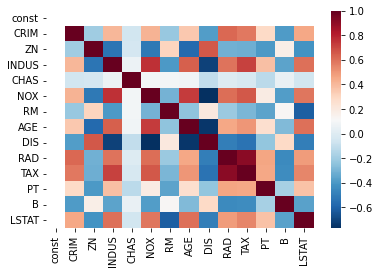

In [132]:
#checking correlation amoung the variables
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


corrs = X.corr()
# mask = np.zeros_like(corrs)
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r')
plt.show()

Some observations from linear model statistics and the correlation graph above <br>

1) Columns 'INDUS' & 'AGE' have very high p-value, indicating they might not be significant for the model<br>
2) We can observe high correlation between the following sets of variables and removing one of them might help in
the model performance<br>
2a) NOX & ZN<br>
2b) AGE & DIS<br>
2c) TAX & RAD<br>
2d) DIS & NOX<br>
2e) DIS & INDUS<br>

In [133]:
# For iteration-2 removing age and indus variables given their low p value and high correlation with other vars
X1= bh_df.drop(['AGE','INDUS','MV'],axis=1)
y=bh_df['MV']

lm1=LinearRegression()

lm1.fit(X1,y)

LinearRegression()

In [134]:

X1=sm.add_constant(X1)
lm1=sm.OLS(y,X1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          5.54e-137
Time:                        17:03:18   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PT            -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

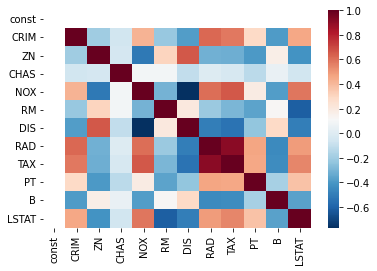

In [135]:
corrs = X1.corr()
# mask = np.zeros_like(corrs)
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r')
plt.show()

There is not much change in the Rsquare value but F-statistic has increased. Next, I'll drop variables 'NOX' and 'RAD' as they are correlated with 'DIS' and 'TAX' vars respectively<br>

In [136]:
X2= bh_df.drop(['AGE','INDUS','NOX','RAD','MV'],axis=1)
y=bh_df['MV']

lm2=LinearRegression()

lm2.fit(X1,y)

LinearRegression()

In [137]:
X2=sm.add_constant(X2)
lm2=sm.OLS(y,X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          5.07e-130
Time:                        17:03:24   Log-Likelihood:                -1520.5
No. Observations:                 506   AIC:                             3061.
Df Residuals:                     496   BIC:                             3103.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0424      4.207      4.051      0.000       8.776      25.309
CRIM          -0.0547      0.033     -1.676      0.094      -0.119       0.009
ZN             0.0482      0.014      3.450      0.001       0.021       0.076
CHAS           2.6985      0.884      3.053      0.002       0.962       4.435
RM             4.2608      0.416     10.254      0.000       3.444       5.077
DIS           -1.0160      0.169     -5.994      0.000      -1.349      -0.683
TAX           -0.0039      0.002     -1.942      0.053      -0.008    4.56e-05
PT            -0.6765      0.127     -5.331      0.000      -0.926      -0.427
B              0.0093      0.003      3.373      0.001       0.004       0.015
LSTAT         -0.5710      0.048    -11.815      0.000      -0.666      -0.476
==============================================================================
Omnibus:                      190.642   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.428
Skew:                           1.596   Prob(JB):                    8.32e-206
Kurtosis:                       8.883   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dropping further variables are reducing the model performance as the Rsquare decreased, so we would stick to 
just dropping only two variables i.e 'AGE' and 'INDUS'

*I have attached linear regression in Excel separtely in the submission page.

## 2. Logistic Regression

In [46]:
os.getcwd()

'/Users/shubhamgoyal/Downloads/Data Sciece 19098 '

In [243]:
loan_df= pd.read_excel('loan.xlsx')
loan_df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [244]:
loan_df.dtypes

Sex                 object
Age                float64
Time_at_address    float64
Res_status          object
Telephone           object
Occupation          object
Job_status          object
Time_employed        int64
Time_bank            int64
Liab_ref            object
Acc_ref             object
Home_Expn            int64
Balance              int64
Decision            object
dtype: object

In [245]:
loan_df.describe()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,31.510163,4.650758,1.871795,2.279720,176.727273,898.382284
std,11.843595,4.804037,3.254023,3.966105,142.590659,3814.565340
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.000000,0.000000,80.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,10.000000
75%,38.250000,7.000000,2.000000,3.000000,272.000000,484.000000
max,76.750000,25.209999,20.000000,23.000000,760.000000,51100.000000


In [246]:
loan_df.Res_status.value_counts()

owner    332
rent      97
Name: Res_status, dtype: int64

In [247]:
cols = loan_df.columns

num_cols = loan_df._get_numeric_data().columns

cat_cols=list(set(cols) - set(num_cols))
print(num_cols,cat_cols)

Index(['Age', 'Time_at_address', 'Time_employed', 'Time_bank', 'Home_Expn',
       'Balance'],
      dtype='object') ['Res_status', 'Liab_ref', 'Job_status', 'Acc_ref', 'Decision', 'Telephone', 'Sex', 'Occupation']


<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
<ipython-input-248-5158431796aa>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotatio

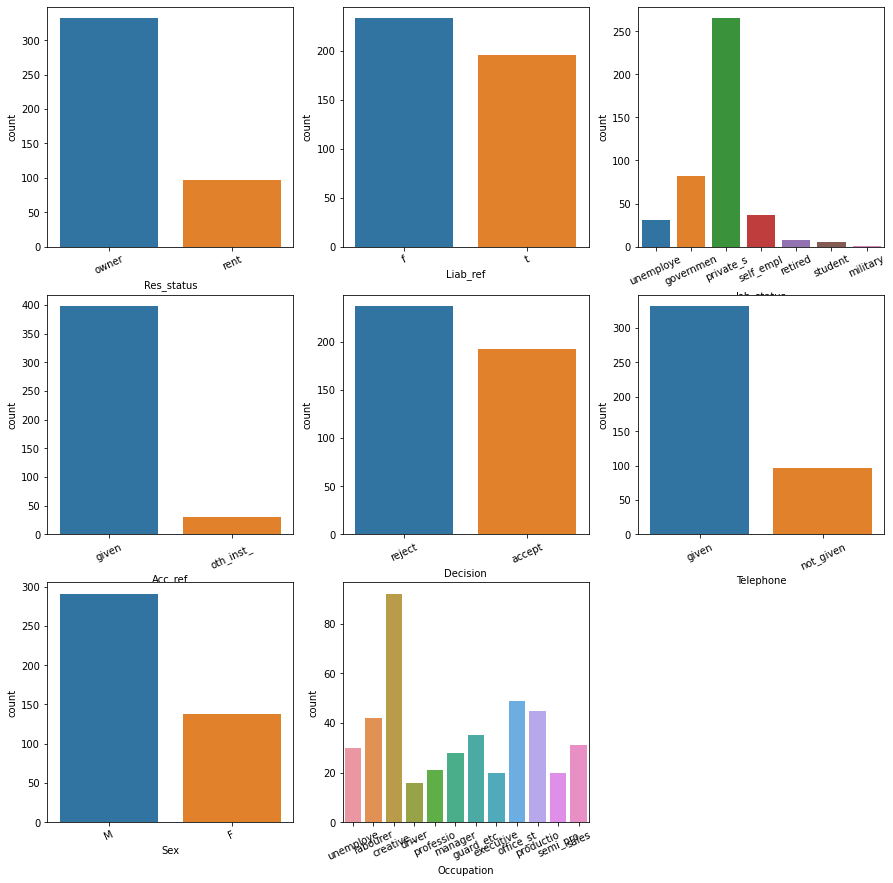

In [248]:
fig = plt.figure(figsize = (15,15))

for i in range(0,len(cat_cols)):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
    sns.countplot(data = loan_df, x = cat_cols[i], ax=ax)

In [249]:
#one hot encoding product_info_2 var as it is string categorical variable

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
col_enc = ['Res_status', 'Liab_ref', 'Job_status', 'Acc_ref', 'Telephone', 'Sex', 'Occupation']

# Use the one-hot encoder to transform the categorical data columns. 
loan_df_enc = pd.DataFrame(OH_encoder.fit_transform(loan_df[col_enc]))

#reassigning the original index.
loan_df_enc.index = loan_df_enc.index

# Addings columns as per the encoding 
loan_df_enc.columns = OH_encoder.get_feature_names(col_enc)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
loan_df_no_enc = loan_df.drop(col_enc, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
loan_df_upd = pd.concat([loan_df_no_enc, loan_df_enc], axis=1)
loan_df_upd.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Res_status_owner,Res_status_rent,Liab_ref_f,Liab_ref_t,Job_status_governmen,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Acc_ref_given,Acc_ref_oth_inst_,Telephone_given,Telephone_not_given,Sex_F,Sex_M,Occupation_creative_,Occupation_driver,Occupation_executive,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye
0,50.750000,0.585,0,0,145,0,reject,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,19.670000,10.000,0,0,140,0,reject,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.830002,15.000,5,14,0,2200,accept,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22.670000,2.540,2,0,0,0,accept,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.250000,13.000,0,0,228,0,reject,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

loan_df_upd['Decision_cat'] = labelencoder.fit_transform(loan_df_upd['Decision'])

loan_df_upd.drop('Decision',inplace=True,axis=1)

loan_df_upd.head()


,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Res_status_owner,Res_status_rent,Liab_ref_f,Liab_ref_t,Job_status_governmen,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Acc_ref_given,Acc_ref_oth_inst_,Telephone_given,Telephone_not_given,Sex_F,Sex_M,Occupation_creative_,Occupation_driver,Occupation_executive,Occupation_guard_etc,Occupation_labourer,Occupation_manager,Occupation_office_st,Occupation_productio,Occupation_professio,Occupation_sales,Occupation_semi_pro,Occupation_unemploye,Decision_cat
0,50.750000,0.585,0,0,145,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,19.670000,10.000,0,0,140,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,52.830002,15.000,5,14,0,2200,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,22.670000,2.540,2,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,29.250000,13.000,0,0,228,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Since the above variables have very high scores, we are going to drop the variables as they are independent of the
response variable

In [251]:
#Conducting mutual info test

from sklearn.feature_selection import mutual_info_classif

# Define a custom function that calculates Mutual Information (MI) scores for a given dataset.
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Define a custom function that plots MI scores in descending order (i.e. most important to least important).
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

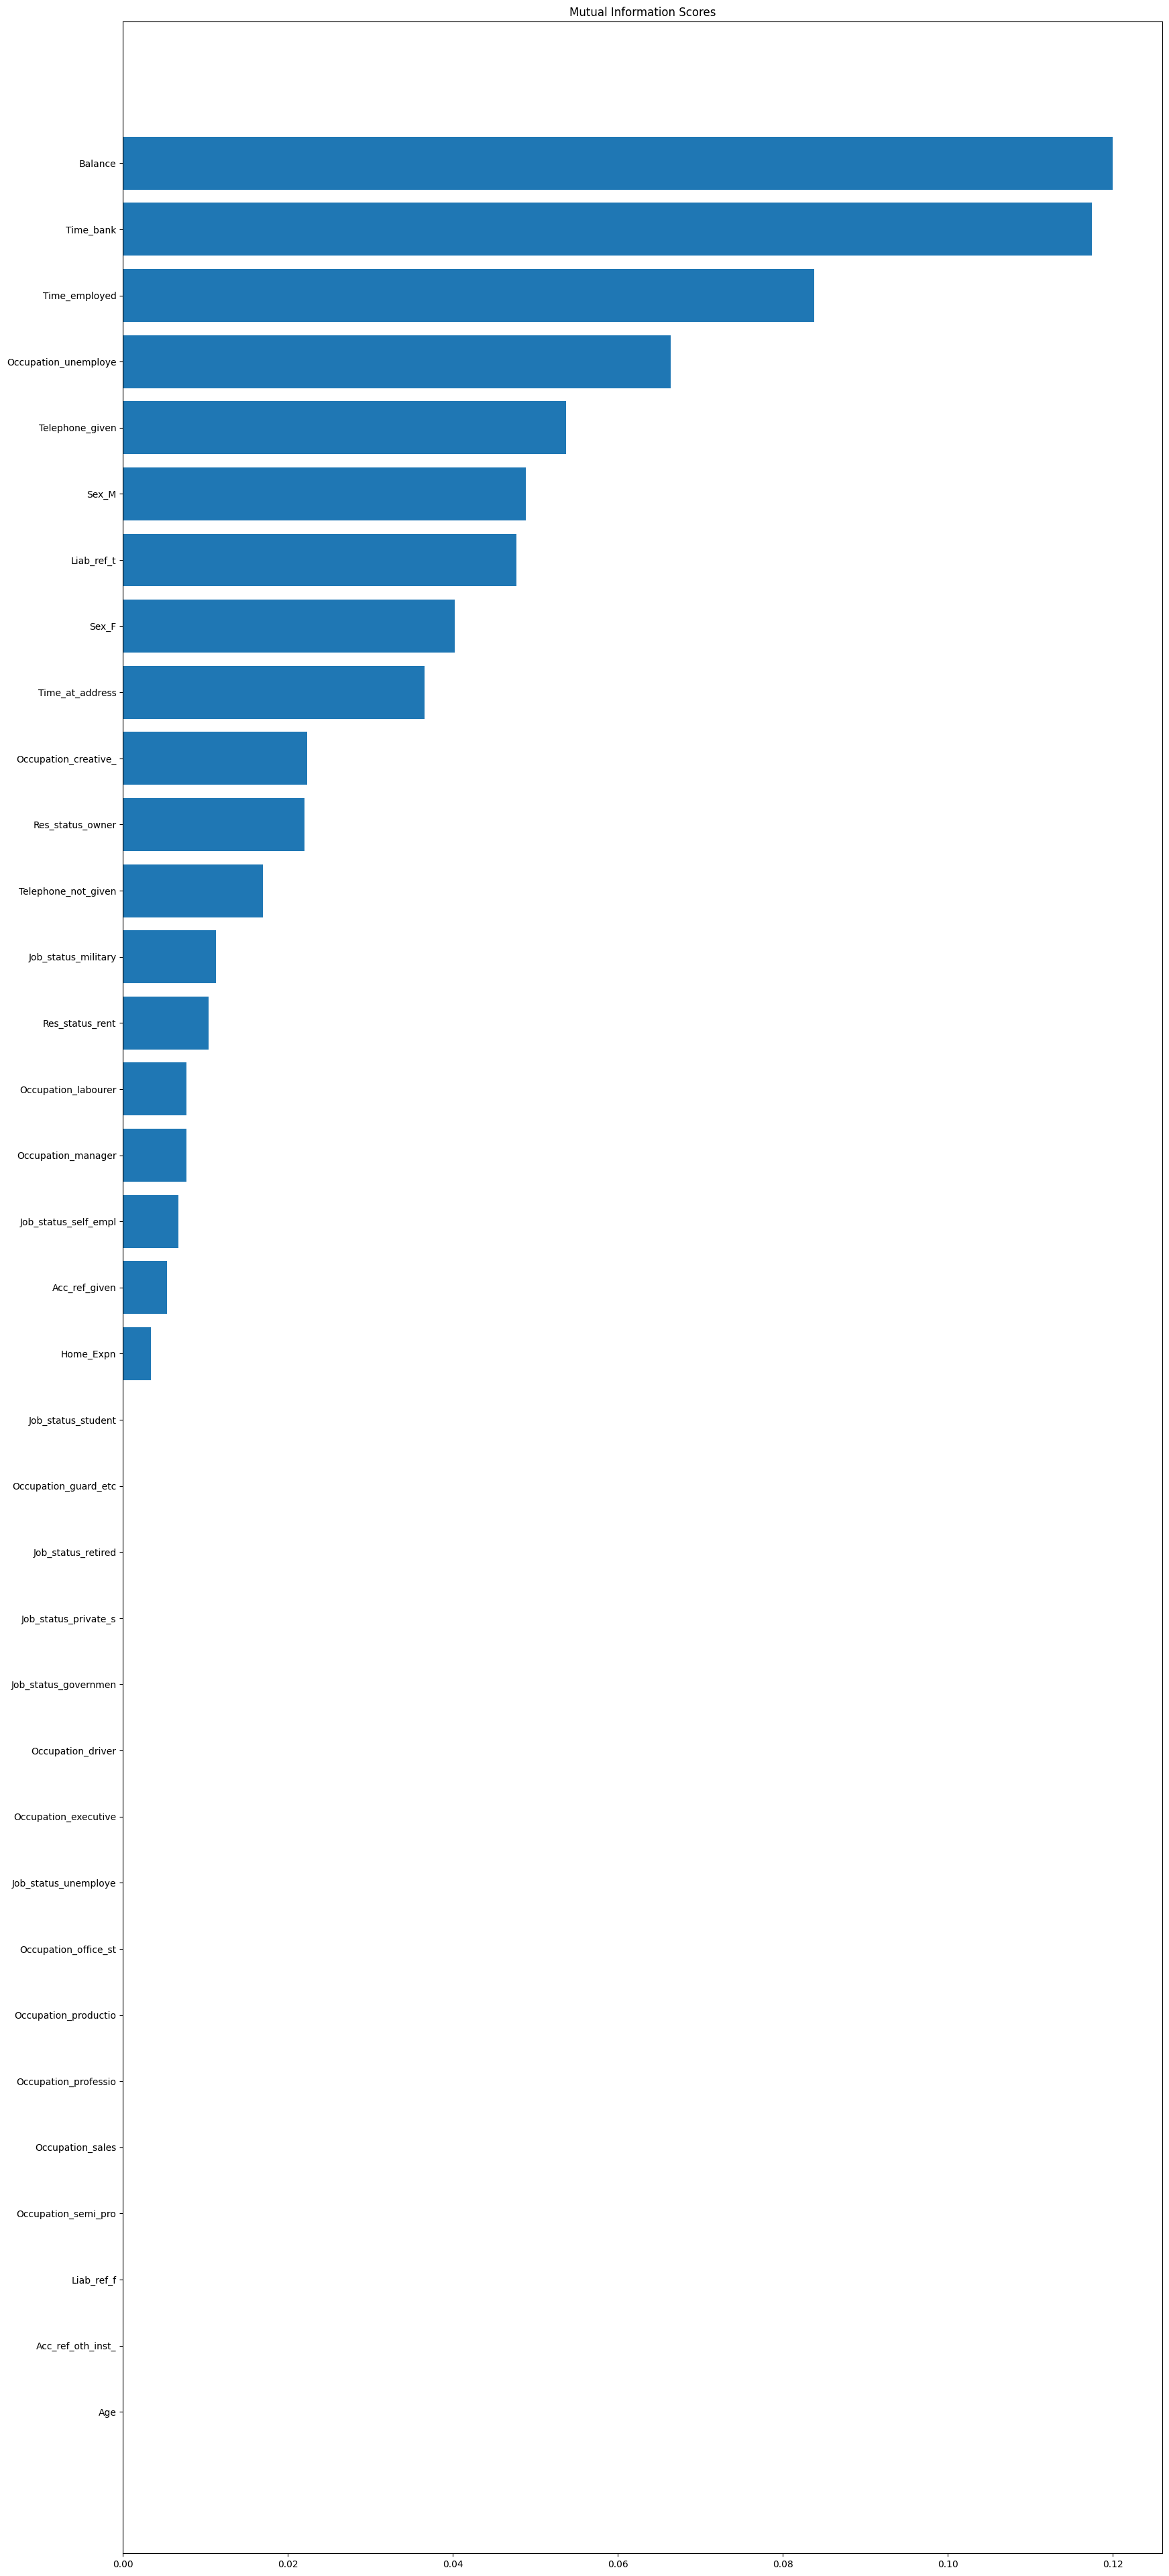

In [252]:
X=loan_df_upd.drop('Decision_cat',axis=1)
y=loan_df_upd['Decision_cat']


# Calculate MI scores on the validation dataset.
mi_scores_X = make_mi_scores(X, y)

# Plot the MI scores obtained from the validation dataset.
plt.figure(dpi=100, figsize=(20,50))
plot_mi_scores(mi_scores_X)



We observe time_bank, balance and time_employed as the top variables based on mutual information

In [253]:
# Checking for multi-colinearity in the variables through variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a custom function that calculates variance inflation factor (VIF) scores - for determining multicollinearity.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Calculate VIF scores on the validation dataset.
vif_scores = calc_vif(X)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variables,VIF
6,Res_status_owner,inf
7,Res_status_rent,inf
8,Liab_ref_f,inf
9,Liab_ref_t,inf
10,Job_status_governmen,inf
11,Job_status_military,inf
12,Job_status_private_s,inf
13,Job_status_retired,inf
14,Job_status_self_empl,inf
15,Job_status_student,inf


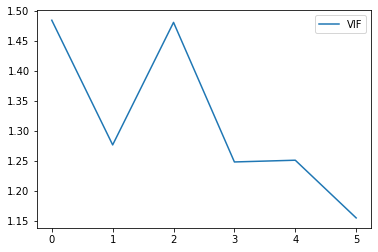

In [254]:
# Plot the VIF scores obtained from the validation dataset. 
vif_scores.plot()

# Display all columns with VIF scores > 10.
vif_scores.loc[vif_scores['VIF'] > 10]


We observe very high multi-colinearity for the above variables as the vif value is Inf, dropping them would be the right way forward

In [255]:
# Checking columns with low multi-colinearity
vif_scores.loc[vif_scores['VIF'] <=10]

,Variables,VIF
0,Age,1.483998
1,Time_at_address,1.276182
2,Time_employed,1.480432
3,Time_bank,1.247759
4,Home_Expn,1.250654
5,Balance,1.154469


In [261]:
vif_scores['Variables'][vif_scores['VIF']<=10].tolist()

['Age',
 'Time_at_address',
 'Time_employed',
 'Time_bank',
 'Home_Expn',
 'Balance']

In [265]:
#taking only those columns where the multi-colinearity is not there to have best model performance
loan_df_upd1=loan_df_upd[vif_scores['Variables'][vif_scores['VIF']<=10].tolist()]
loan_df_upd1.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,50.750000,0.585,0,0,145,0
1,19.670000,10.000,0,0,140,0
2,52.830002,15.000,5,14,0,2200
3,22.670000,2.540,2,0,0,0
4,29.250000,13.000,0,0,228,0


In [268]:
from sklearn.linear_model import LogisticRegression

X=loan_df_upd1.copy()
y=loan_df_upd['Decision_cat']

lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [267]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.506693
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.263     
Dependent Variable: Decision_cat     AIC:              446.7423  
Date:               2022-09-21 22:16 BIC:              471.1110  
No. Observations:   429              Log-Likelihood:   -217.37   
Df Model:           5                LL-Null:          -295.00   
Df Residuals:       423              LLR p-value:      1.0182e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age                0.0296   0.0075  3.9664 0.0001  0.0150  0.0442
Time_at_address    0.0224   0.0271  0.8264 0.4086 -0.0307  0.0754
Time_employed     -0.2954   0.0584 -5.0552 0.0000 -0.4100 -0.1809
Time_bank         -0.3267   0.0537 -6.0841 0.0000 -0.4320 -0.2215
Home_Expn          0.0021   0.0008  2.6629 0.0077  0.0006  0.0037
Balance           -0.0004   0.0001 -3.1678 0.0015 -0.0006 -0.0001
=================================================================

"""

In [269]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

pred = lr.predict(X)
conf_mat = confusion_matrix(y, pred)
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))
precision_recall_fscore_support(list(y.values), list(pred))

Precision 0.8405797101449275
Recall 0.6041666666666666
Specificity 0.9071729957805907


(array([0.84057971, 0.73883162]),
 array([0.60416667, 0.907173  ]),
 array([0.7030303 , 0.81439394]),
 array([192, 237]))